DATA EXPLORATION

Importing data from our file





In [72]:
import pandas as pd
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Loading the dataset
file_path = "train_data_question_2.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())

# Check the structure of the dataset
print(df.info())


   Age   Gender  BMI  Fever  Nausea/Vomting  Headache   Diarrhea   \
0    56       1   35      2               1          1          1   
1    46       1   29      1               2          2          1   
2    49       2   33      1               2          1          2   
3    59       1   32      1               1          2          1   
4    42       2   26      1               1          2          2   

   Fatigue & generalized bone ache   Jaundice   Epigastric pain   ...  ALT 36  \
0                                 2          2                 2  ...       5   
1                                 2          2                 1  ...      57   
2                                 1          2                 1  ...      48   
3                                 2          2                 2  ...      94   
4                                 2          2                 2  ...      84   

   ALT 48  ALT after 24 w  RNA Base    RNA 4   RNA 12  RNA EOT  RNA EF  \
0       5               

In [73]:
#there is no missing values

In [74]:
import pandas as pd

# Basic statistics for numerical variables
numerical_stats = df.describe()

print("Basic Statistics for Numerical Variables:")
print(numerical_stats)


Basic Statistics for Numerical Variables:
              Age        Gender          BMI        Fever  Nausea/Vomting  \
count  1185.000000  1185.000000  1185.000000  1185.000000     1185.000000   
mean     46.274262     1.490295    28.691983     1.518987        1.498734   
std       8.851337     0.500117     4.049167     0.499850        0.500210   
min      32.000000     1.000000    22.000000     1.000000        1.000000   
25%      38.000000     1.000000    25.000000     1.000000        1.000000   
50%      46.000000     1.000000    29.000000     2.000000        1.000000   
75%      54.000000     2.000000    32.000000     2.000000        2.000000   
max      61.000000     2.000000    35.000000     2.000000        2.000000   

         Headache     Diarrhea   Fatigue & generalized bone ache   \
count  1185.000000  1185.000000                       1185.000000   
mean      1.499578     1.497890                          1.509705   
std       0.500211     0.500207                          

In [75]:
print(df.columns)


Index(['Age ', 'Gender', 'BMI', 'Fever', 'Nausea/Vomting', 'Headache ',
       'Diarrhea ', 'Fatigue & generalized bone ache ', 'Jaundice ',
       'Epigastric pain ', 'WBC', 'RBC', 'HGB', 'Plat', 'AST 1', 'ALT 1',
       'ALT4', 'ALT 12', 'ALT 24', 'ALT 36', 'ALT 48', 'ALT after 24 w',
       'RNA Base', 'RNA 4', 'RNA 12', 'RNA EOT', 'RNA EF',
       'Baseline histological Grading', 'Baselinehistological staging'],
      dtype='object')


In [76]:
# Calculate the variance for each column
variance = df.var()

# Print the variance for each column
print("Variance for each column:")
print(variance)


Variance for each column:
Age                                 7.834617e+01
Gender                              2.501169e-01
BMI                                 1.639575e+01
Fever                               2.498503e-01
Nausea/Vomting                      2.502095e-01
Headache                            2.502110e-01
Diarrhea                            2.502067e-01
Fatigue & generalized bone ache     2.501169e-01
Jaundice                            2.501967e-01
Epigastric pain                     2.500613e-01
WBC                                 7.214053e+06
RBC                                 1.200068e+11
HGB                                 2.959405e+00
Plat                                1.483044e+09
AST 1                               6.789332e+02
ALT 1                               6.668518e+02
ALT4                                6.958949e+02
ALT 12                              6.673846e+02
ALT 24                              6.922013e+02
ALT 36                              6.90771

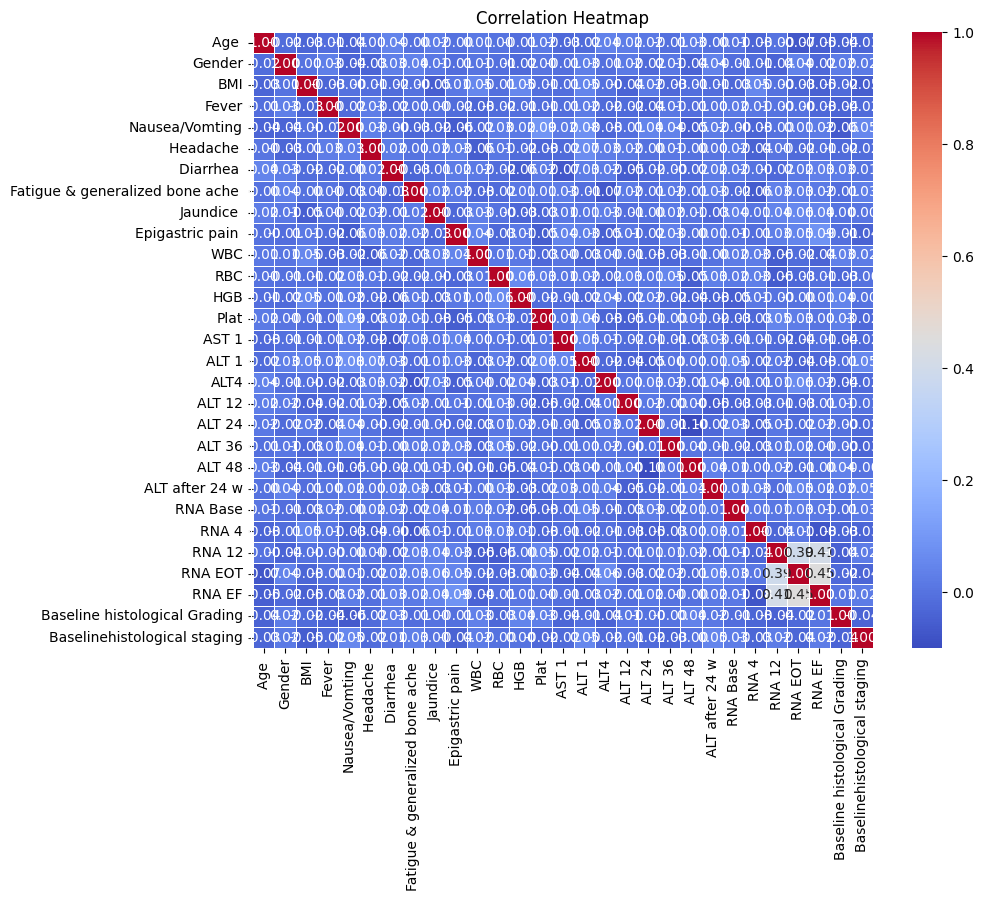

In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.savefig('correlation_heatmap.png')  # Save the figure as PNG file
plt.show()


In [78]:
import pandas as pd
from scipy.stats import mstats
# Apply winsorization to handle outliers for all columns
df_win = df.copy()
for col in df_win.columns:
    df_win[col] = mstats.winsorize(df_win[col], limits=[0.05, 0.05])

# Now, there is no outliers in all columns are handled using winsorization


Encoding and data Splitting

In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# Separate features (X) and target variable (y)
X = df.drop(columns=[ 'Baselinehistological staging'])
y = df['Baselinehistological staging']

# Perform one-hot encoding for categorical variables
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
X_encoded = pd.get_dummies(X, columns=categorical_cols)

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and fit SVM model
svm = SVC(kernel='linear', C=1.0)
svm.fit(X_train, y_train)

# Predict the target variable for test data
y_pred = svm.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.29535864978902954


I am just wanted to see the accuracies of all models with all features before applying LDA , PCA etc

In [80]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

class ClassifierSuite:
    def __init__(self, classifiers):
        self.classifiers = classifiers

    def train_and_evaluate(self, X_train, X_test, y_train, y_test):
        results = {}
        for name, clf in self.classifiers.items():
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            results[name] = {
                'accuracy': accuracy,
                'predictions': y_pred
            }
        return results

# Separate features (X) and target variable (y)
X = df.drop(columns=['Baselinehistological staging'])
y = df['Baselinehistological staging']

# Perform one-hot encoding for categorical variables
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
X_encoded = pd.get_dummies(X, columns=categorical_cols)

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    'SVM': SVC(kernel='linear', C=1.0),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Voting Classifier': VotingClassifier(estimators=[
        ('SVM', SVC(kernel='linear', C=1.0)),
        ('Random Forest', RandomForestClassifier()),
        ('Gradient Boosting', GradientBoostingClassifier()),
        ('Logistic Regression', LogisticRegression()),
        ('Decision Tree', DecisionTreeClassifier()),
        ('K-Nearest Neighbors', KNeighborsClassifier()),
        ('Naive Bayes', GaussianNB())
    ])
}

# Create ClassifierSuite instance
suite = ClassifierSuite(classifiers)

# Train and evaluate classifiers
results = suite.train_and_evaluate(X_train, X_test, y_train, y_test)
from sklearn.metrics import precision_score, recall_score, f1_score

# Train and evaluate classifiers
for name, result in results.items():
    accuracy = result['accuracy']
    y_pred = result['predictions']
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"Classifier: {name}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print("----------------------------------")


Classifier: SVM
Accuracy: 0.29535864978902954
Precision: 0.30640671342061676
Recall: 0.29535864978902954
F1 Score: 0.2939118986143302
----------------------------------
Classifier: Random Forest
Accuracy: 0.21940928270042195
Precision: 0.22053811167735218
Recall: 0.21940928270042195
F1 Score: 0.21907269485130582
----------------------------------
Classifier: Gradient Boosting
Accuracy: 0.22784810126582278
Precision: 0.22568141180522844
Recall: 0.22784810126582278
F1 Score: 0.2255975925110524
----------------------------------
Classifier: Logistic Regression
Accuracy: 0.2742616033755274
Precision: 0.26123458882683226
Recall: 0.2742616033755274
F1 Score: 0.256575227053671
----------------------------------
Classifier: Decision Tree
Accuracy: 0.20253164556962025
Precision: 0.19910062330362935
Recall: 0.20253164556962025
F1 Score: 0.2004406856526308
----------------------------------
Classifier: K-Nearest Neighbors
Accuracy: 0.270042194092827
Precision: 0.28478164371928855
Recall: 0.270042

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


APPLYING PCA WITH n COMPONENT = that covers 95 %  variance

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Separate features (X) and target variable (y)
X = df.drop(columns=['Baselinehistological staging'])  # Features
y = df['Baselinehistological staging']  # Target variable

# Initialize and fit PCA model
pca = PCA(n_components=0.95)  # Specify the number of components you want to reduce to
X_pca = pca.fit_transform(X)

# Concatenate X_pca with y
data_with_target = pd.concat([pd.DataFrame(X_pca), y], axis=1)

# Save the DataFrame to a CSV file
data_with_target.to_csv('pca_label.csv', index=False)


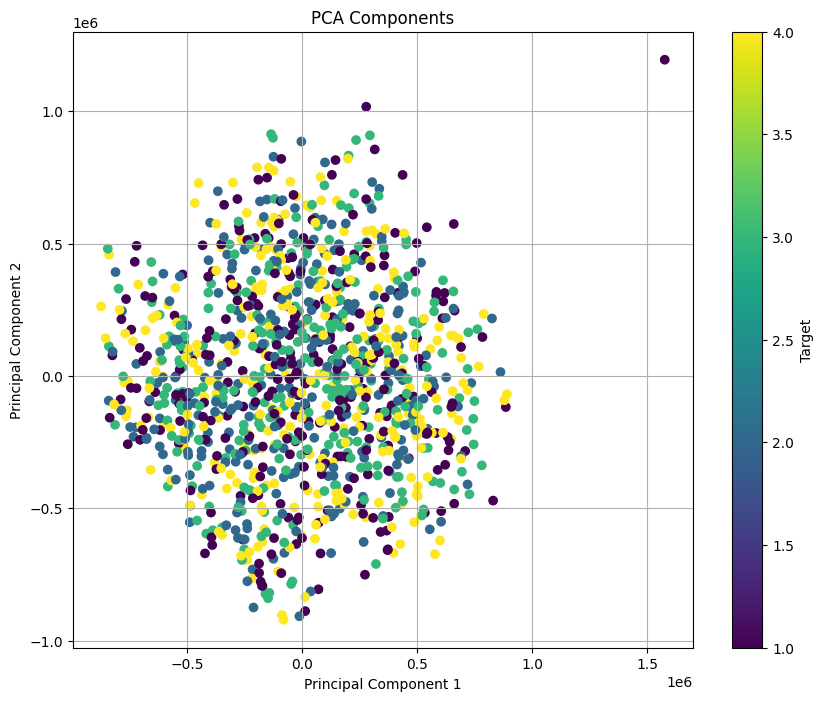

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the PCA-transformed data along with the target variable
data_with_target = pd.read_csv('pca_label.csv')

# Separate features (X) and target variable (y)
X_pca = data_with_target.drop(columns=['Baselinehistological staging'])  # PCA-transformed features
y = data_with_target['Baselinehistological staging']  # Target variable

# Plot the PCA components
plt.figure(figsize=(10, 8))
plt.scatter(X_pca.iloc[:, 0], X_pca.iloc[:, 1], c=y, cmap='viridis')
plt.title('PCA Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Target')
plt.grid(True)

# Save the plot as an image
plt.savefig('pca_components_plot.png')

# Show the plot
plt.show()


Added Standardiation

In [96]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the data
df = pd.read_csv('pca_label.csv')

class ClassifierSuite:
    def __init__(self, classifiers):
        self.classifiers = classifiers

    def train_and_evaluate(self, X_train, X_test, y_train, y_test):
        results = {}
        for name, clf in self.classifiers.items():
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            results[name] = {
                'accuracy': accuracy,
                'confusion_matrix': conf_matrix ,
                'predictions': y_pred
            }
        return results

# Separate features (X) and target variable (y)
X = df.drop(columns=['Baselinehistological staging'])
y = df['Baselinehistological staging']

# Perform one-hot encoding for categorical variables
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
X_encoded = pd.get_dummies(X, columns=categorical_cols)

# Apply standardization to numerical features
numerical_cols = X_encoded.select_dtypes(include=['int', 'float']).columns.tolist()
scaler = StandardScaler()
X_encoded[numerical_cols] = scaler.fit_transform(X_encoded[numerical_cols])

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    'SVM': SVC(kernel='linear', C=1.0),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Voting Classifier': VotingClassifier(estimators=[
        ('SVM', SVC(kernel='linear', C=1.0)),
        ('Random Forest', RandomForestClassifier()),
        ('Gradient Boosting', GradientBoostingClassifier()),
        ('Logistic Regression', LogisticRegression()),
        ('Decision Tree', DecisionTreeClassifier()),
        ('K-Nearest Neighbors', KNeighborsClassifier()),
        ('Naive Bayes', GaussianNB())
    ])
}

# Create ClassifierSuite instance
suite = ClassifierSuite(classifiers)

# Train and evaluate classifiers
results = suite.train_and_evaluate(X_train, X_test, y_train, y_test)

# Print evaluation metrics
for name, result in results.items():
    accuracy = result['accuracy']
    y_pred = result['predictions']
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"Classifier: {name}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print("----------------------------------")


Classifier: SVM
Accuracy: 0.22362869198312235
Precision: 0.22897726680476166
Recall: 0.22362869198312235
F1 Score: 0.2093555118916813
----------------------------------
Classifier: Random Forest
Accuracy: 0.26582278481012656
Precision: 0.2652619030787602
Recall: 0.26582278481012656
F1 Score: 0.2647135507281651
----------------------------------
Classifier: Gradient Boosting
Accuracy: 0.26582278481012656
Precision: 0.2676758978546178
Recall: 0.26582278481012656
F1 Score: 0.26508932082017606
----------------------------------
Classifier: Logistic Regression
Accuracy: 0.20253164556962025
Precision: 0.20113327768570186
Recall: 0.20253164556962025
F1 Score: 0.19447715457863113
----------------------------------
Classifier: Decision Tree
Accuracy: 0.25738396624472576
Precision: 0.25782994622068744
Recall: 0.25738396624472576
F1 Score: 0.2566284658001462
----------------------------------
Classifier: K-Nearest Neighbors
Accuracy: 0.24050632911392406
Precision: 0.2662093308544198
Recall: 0.240

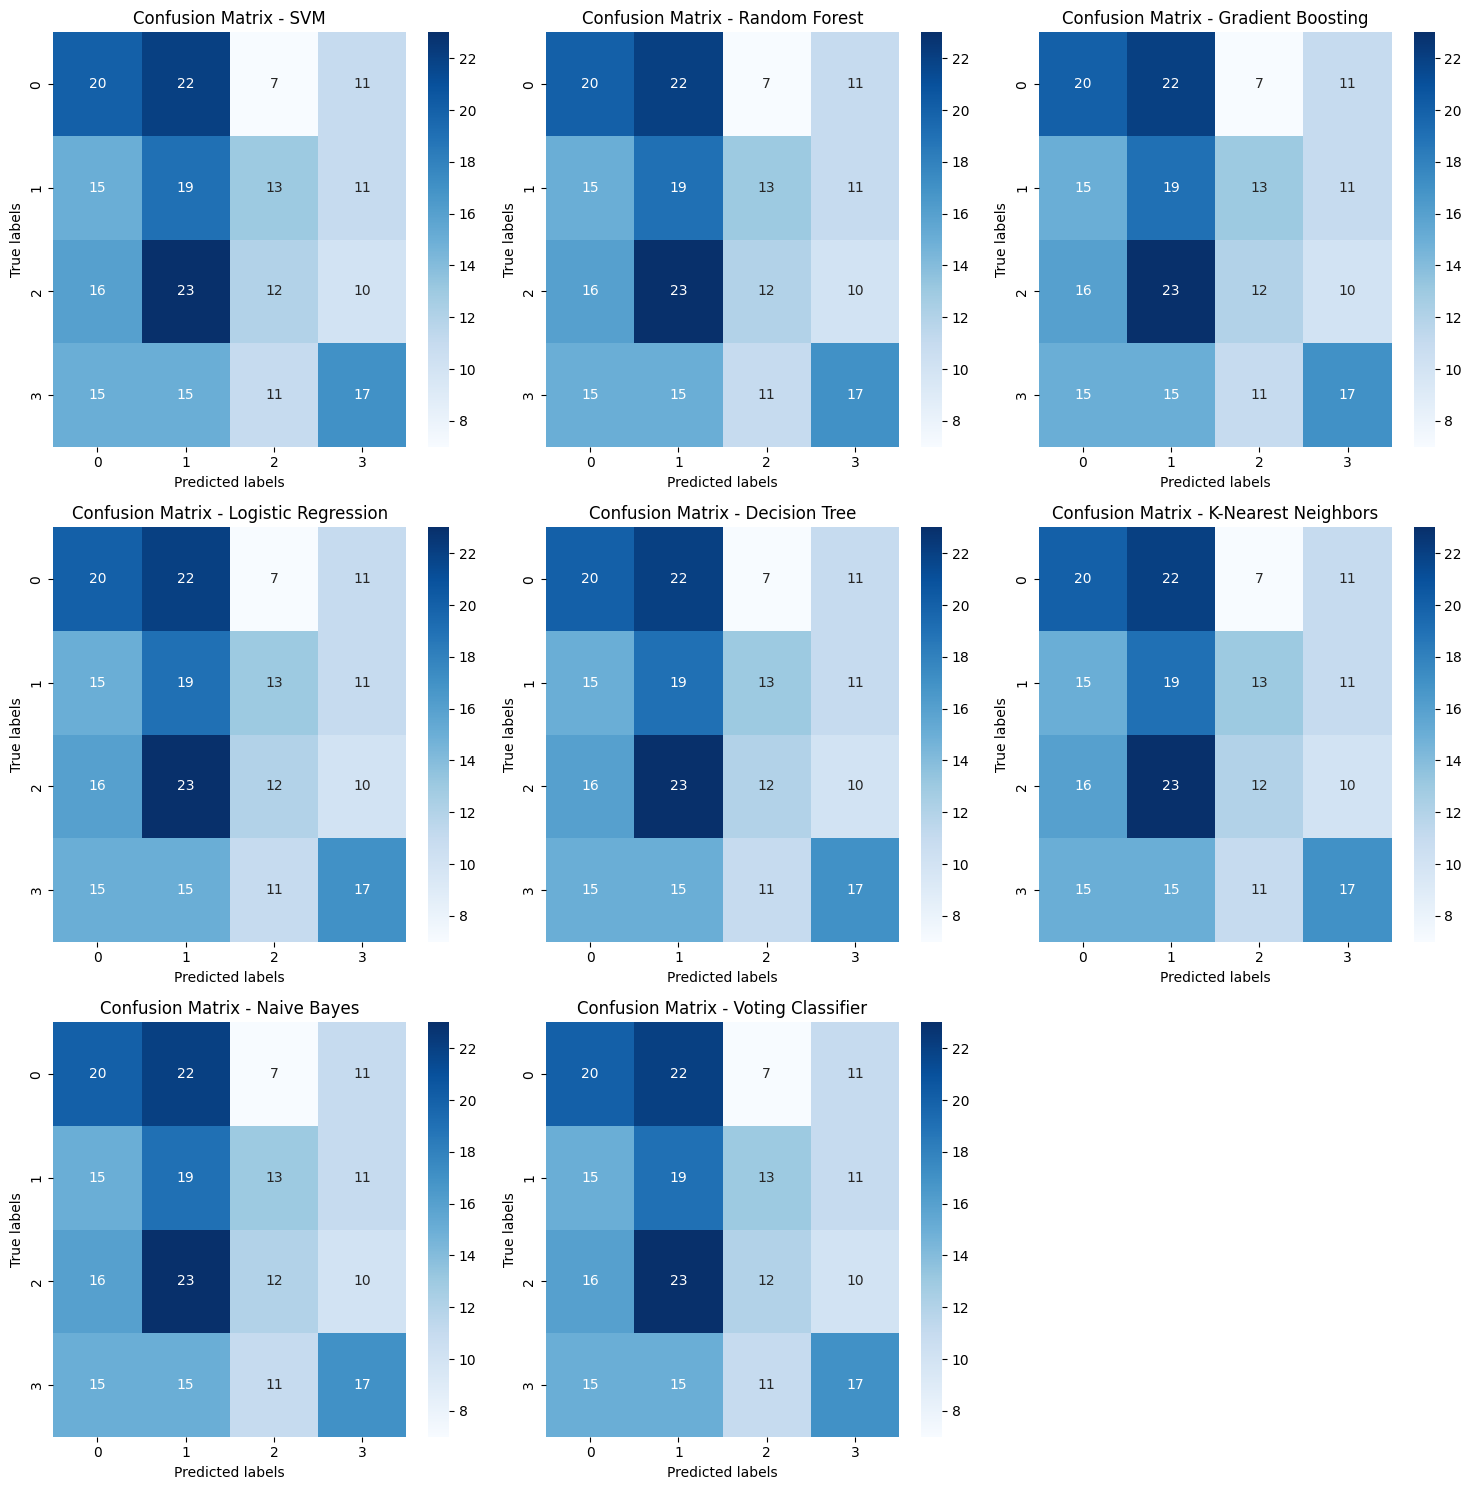

In [97]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Create ClassifierSuite instance
suite = ClassifierSuite(classifiers)

# Train and evaluate classifiers
results = suite.train_and_evaluate(X_train, X_test, y_train, y_test)

# Create a grid layout for confusion matrices
num_classifiers = len(classifiers)
num_cols = 3
num_rows = (num_classifiers + num_cols - 1) // num_cols
plt.figure(figsize=(15, 5 * num_rows))

# Plot confusion matrices
for i, (name, result) in enumerate(results.items()):
    conf_matrix = result['confusion_matrix']
    plt.subplot(num_rows, num_cols, i + 1)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')

plt.tight_layout()
plt.show()

NOW Applying LDA By Taking Maximum value of LDA which in our case is Max numbe of Class -1 = 4 -1  = 3

In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Load the DataFrame from CSV file
df = pd.read_csv('train_data_question_2.csv')

# Separate features (X) and target variable (y)
X = df.drop(columns=['Baselinehistological staging'])  # Features
y = df['Baselinehistological staging']  # Target variable

# Initialize and fit LDA model
lda = LinearDiscriminantAnalysis(n_components=3)
X_lda = lda.fit_transform(X, y)

# Save LDA-transformed features along with target variable to a new CSV file
df_lda.to_csv('lda_target.csv', index=False)


In [87]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Load the DataFrame from CSV file
df = pd.read_csv('train_data_question_2.csv')

# Separate features (X) and target variable (y)
X = df.drop(columns=['Baselinehistological staging'])  # Features
y = df['Baselinehistological staging']  # Target variable

# Initialize and fit LDA model
lda = LinearDiscriminantAnalysis(n_components=3)
X_lda = lda.fit_transform(X, y)

# Create a DataFrame with LDA-transformed features and target variable
df_lda_target = pd.DataFrame(data=X_lda, columns=['LDA Component 1', 'LDA Component 2', 'LDA Component 3'])
df_lda_target['Baselinehistological staging'] = y

# Save LDA-transformed features along with target variable to a new CSV file
df_lda_target.to_csv('lda_target.csv', index=False)


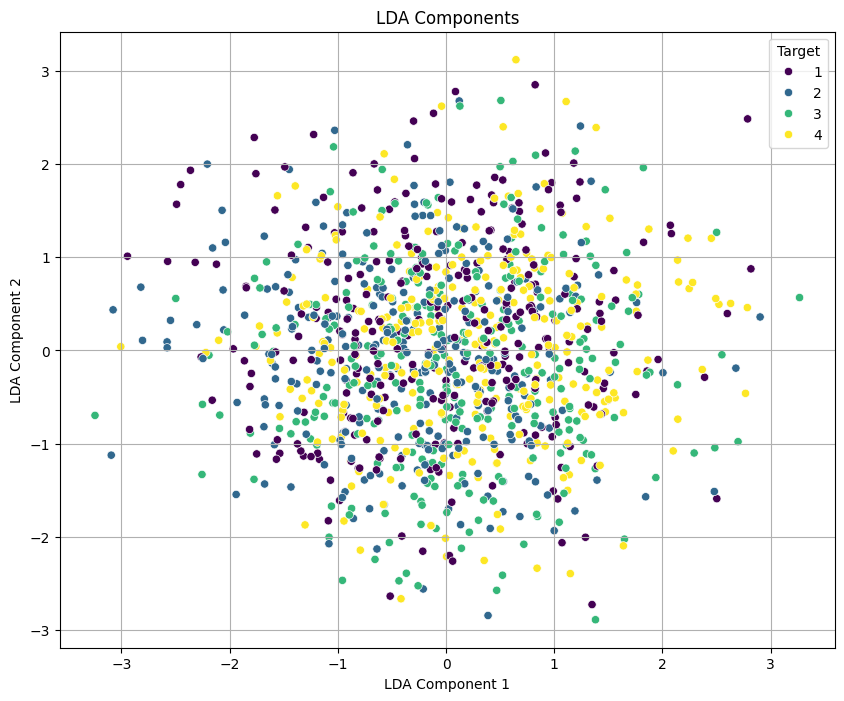

In [88]:
# Plot the LDA components
plt.figure(figsize=(10, 8))
sns.scatterplot(x='LDA Component 1', y='LDA Component 2', hue='Target', data=df_lda, palette='viridis')
plt.title('LDA Components')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.legend(title='Target', loc='upper right')
plt.grid(True)

# Save the plot as an image
plt.savefig('lda_components_plot.png')

# Show the plot
plt.show()


Shape of transformed features after LDA: (1185, 3)


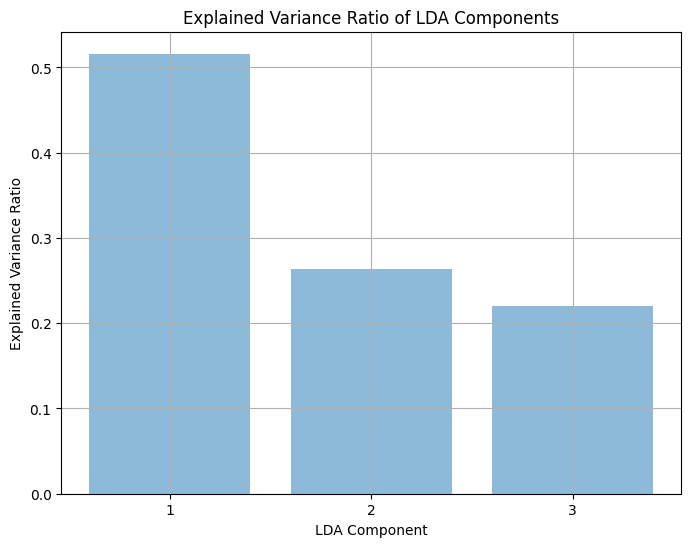

In [89]:
# Print the shape of transformed features after LDA
print("Shape of transformed features after LDA:", X_lda.shape)

# Plot the explained variance ratio
plt.figure(figsize=(8, 6))
plt.bar(range(1, lda.explained_variance_ratio_.shape[0] + 1), lda.explained_variance_ratio_, alpha=0.5, align='center')
plt.title('Explained Variance Ratio of LDA Components')
plt.xlabel('LDA Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, lda.explained_variance_ratio_.shape[0] + 1))
plt.grid(True)

# Save the plot as an image
plt.savefig('explained_variance_ratio_plot.png')

# Show the plot
plt.show()

In [94]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the data
df = pd.read_csv('lda_target.csv')

class ClassifierSuite:
    def __init__(self, classifiers):
        self.classifiers = classifiers

    def train_and_evaluate(self, X_train, X_test, y_train, y_test):
        results = {}
        for name, clf in self.classifiers.items():
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            results[name] = {
                'accuracy': accuracy,
                'confusion_matrix': conf_matrix ,
                'predictions': y_pred
            }
        return results

# Separate features (X) and target variable (y)
X = df.drop(columns=['Baselinehistological staging'])
y = df['Baselinehistological staging']

# Perform one-hot encoding for categorical variables
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
X_encoded = pd.get_dummies(X, columns=categorical_cols)

# Apply standardization to numerical features
numerical_cols = X_encoded.select_dtypes(include=['int', 'float']).columns.tolist()
scaler = StandardScaler()
X_encoded[numerical_cols] = scaler.fit_transform(X_encoded[numerical_cols])

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    'SVM': SVC(kernel='linear', C=1.0),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Voting Classifier': VotingClassifier(estimators=[
        ('SVM', SVC(kernel='linear', C=1.0)),
        ('Random Forest', RandomForestClassifier()),
        ('Gradient Boosting', GradientBoostingClassifier()),
        ('Logistic Regression', LogisticRegression()),
        ('Decision Tree', DecisionTreeClassifier()),
        ('K-Nearest Neighbors', KNeighborsClassifier()),
        ('Naive Bayes', GaussianNB())
    ])
}

# Create ClassifierSuite instance
suite = ClassifierSuite(classifiers)

# Train and evaluate classifiers
results = suite.train_and_evaluate(X_train, X_test, y_train, y_test)

# Print evaluation metrics
for name, result in results.items():
    accuracy = result['accuracy']
    y_pred = result['predictions']
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"Classifier: {name}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print("----------------------------------")


Classifier: SVM
Accuracy: 0.29957805907172996
Precision: 0.3007077262104744
Recall: 0.29957805907172996
F1 Score: 0.29752174997648995
----------------------------------
Classifier: Random Forest
Accuracy: 0.25738396624472576
Precision: 0.25858582591536905
Recall: 0.25738396624472576
F1 Score: 0.25647197027864255
----------------------------------
Classifier: Gradient Boosting
Accuracy: 0.2320675105485232
Precision: 0.2330205201856659
Recall: 0.2320675105485232
F1 Score: 0.23027689649659183
----------------------------------
Classifier: Logistic Regression
Accuracy: 0.2911392405063291
Precision: 0.29384534035696824
Recall: 0.2911392405063291
F1 Score: 0.2893516490325757
----------------------------------
Classifier: Decision Tree
Accuracy: 0.25316455696202533
Precision: 0.25192677369674316
Recall: 0.25316455696202533
F1 Score: 0.2515362759201079
----------------------------------
Classifier: K-Nearest Neighbors
Accuracy: 0.28270042194092826
Precision: 0.28744988853487946
Recall: 0.28270

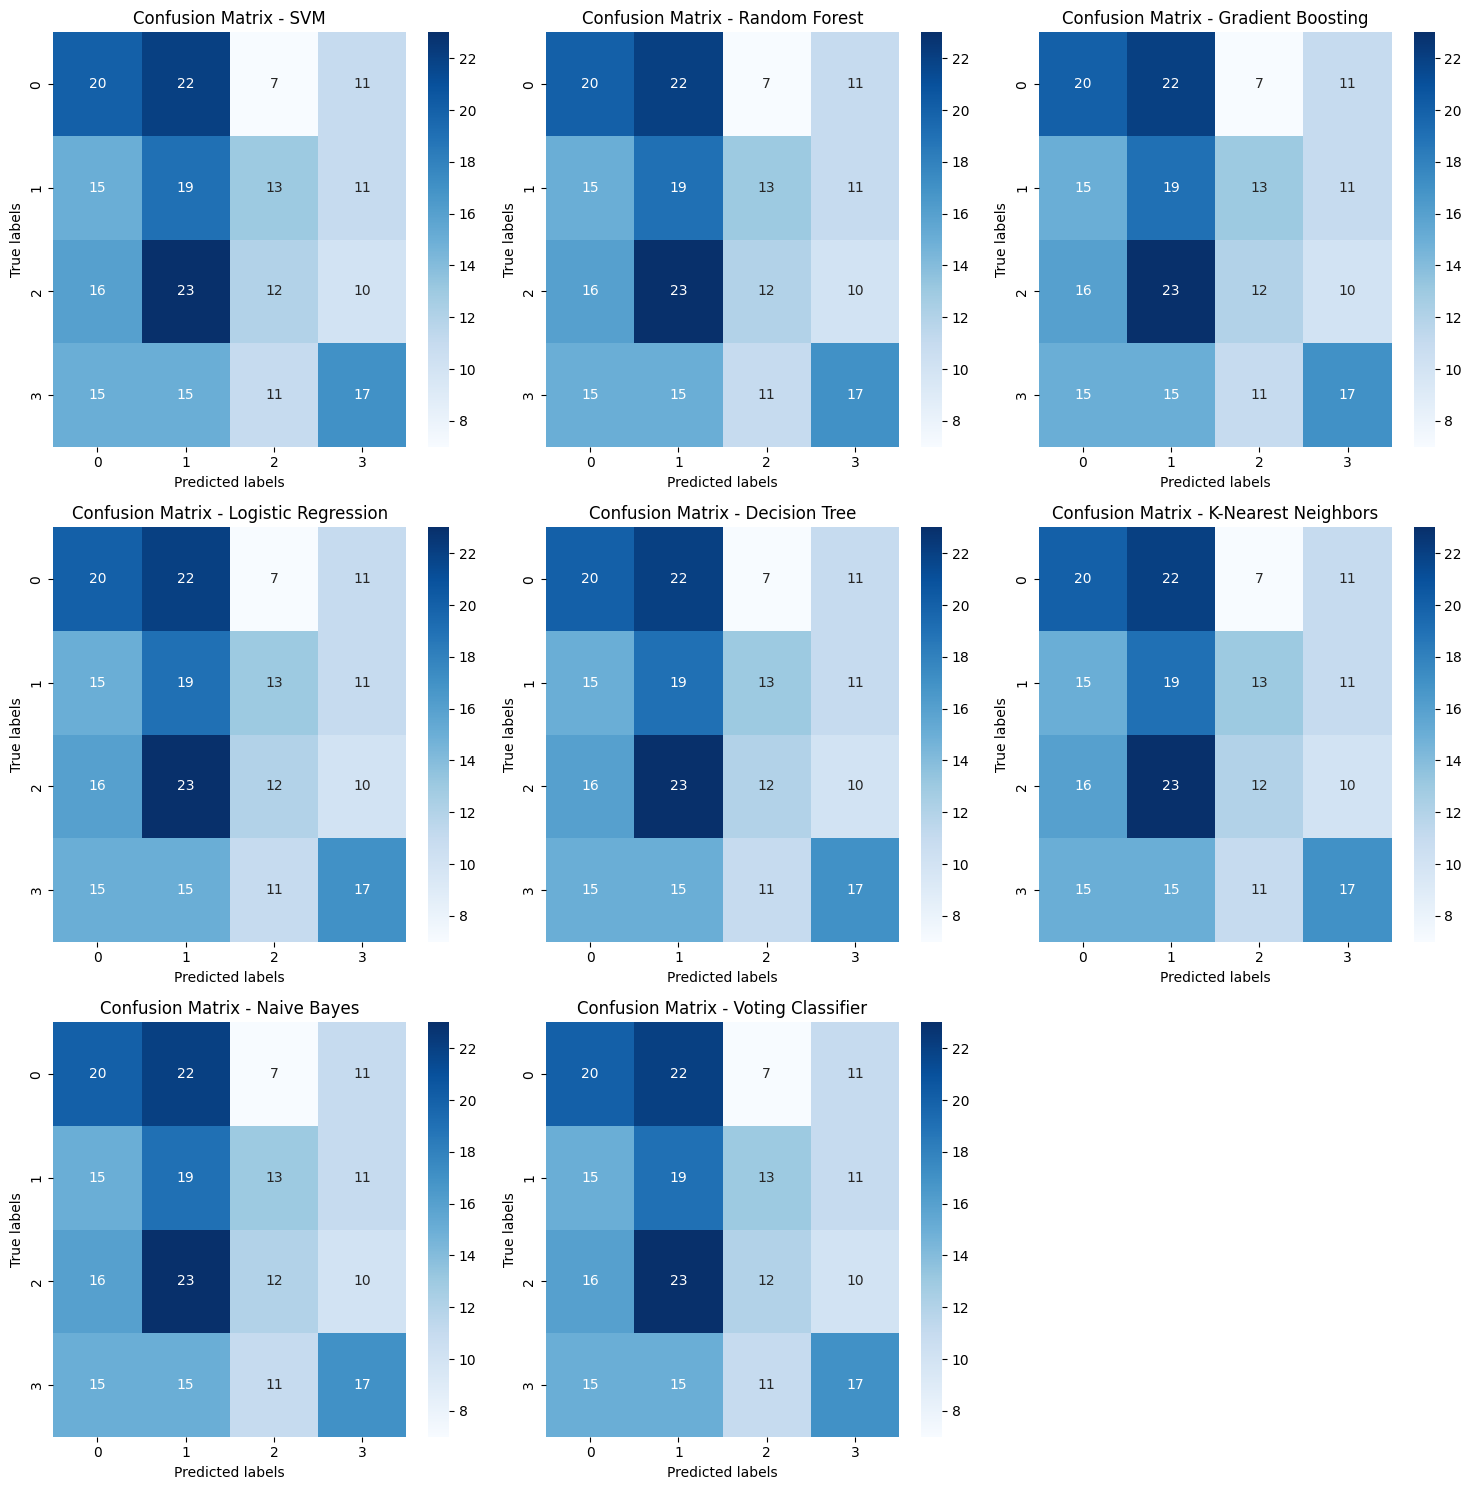

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


# Create ClassifierSuite instance
suite = ClassifierSuite(classifiers)

# Train and evaluate classifiers
results = suite.train_and_evaluate(X_train, X_test, y_train, y_test)

# Create a grid layout for confusion matrices
num_classifiers = len(classifiers)
num_cols = 3
num_rows = (num_classifiers + num_cols - 1) // num_cols
plt.figure(figsize=(15, 5 * num_rows))

# Plot confusion matrices
for i, (name, result) in enumerate(results.items()):
    conf_matrix = result['confusion_matrix']
    plt.subplot(num_rows, num_cols, i + 1)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')

plt.tight_layout()
plt.show()


In [93]:
#highets Accuracy Naive Biase with 30.8 % taking all default parameters for classifiers . However we can do paramete tunnig for better accuracy
#So this is the highets accuracy i got after applying all the Classifiers as well as some feature extraction techniques like PCA , LDA .